In [1]:
import pyod
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Exercise 1:

In [2]:
def create_linear_data(mean_epsilon, std_epsilon, mean_x, std_x, num_samples, title):
    a = 1.2
    b = 1
    x1 = np.random.normal(loc=mean_x, scale=std_x, size=num_samples)
    epsilon = np.random.normal(loc=mean_epsilon, scale=std_epsilon, size=num_samples)
    y = a * x1 + b + epsilon

    data = np.column_stack((x1, [1] * num_samples))
    A = data
    U, S, VT = np.linalg.svd(A, full_matrices=False)
    H = U @ U.T
    leverage_scores = np.diag(H)
    threshold = np.quantile(leverage_scores, 0.95)
    outliers = np.where(leverage_scores > threshold)[0]

    fig, ax = plt.subplots()
    ax.scatter(x1, y, alpha=0.5)
    ax.scatter(x1[outliers], y[outliers], color='red', label='Outliers')
    ax.set_xlabel('x1')
    ax.set_ylabel('y')
    ax.set_title(title)
    ax.legend()


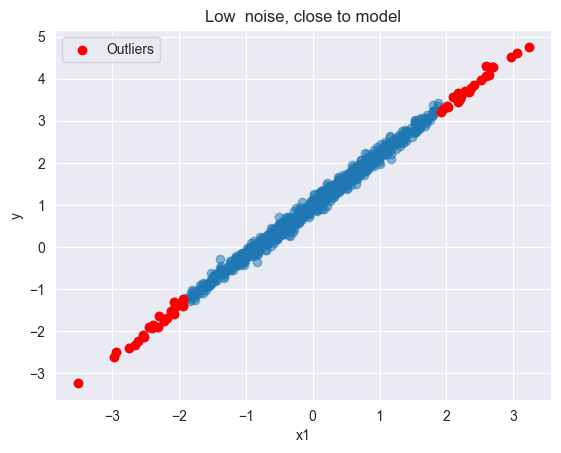

In [3]:
create_linear_data(mean_epsilon=0, std_epsilon=0.1, mean_x=0, std_x=1, num_samples=1000, title = "Low  noise, close to model")

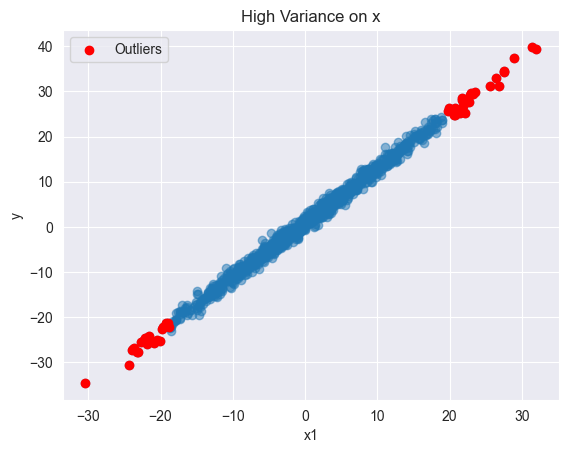

In [6]:
create_linear_data(mean_epsilon=0, std_epsilon=1, mean_x=0, std_x=10, num_samples=1000, title = "High Variance on x")

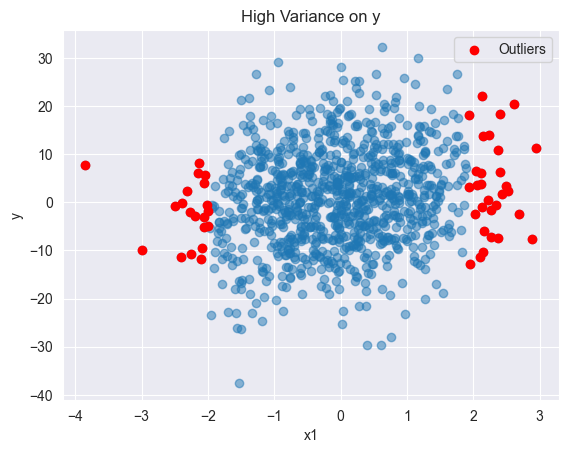

In [7]:
create_linear_data(mean_epsilon=0, std_epsilon=10, mean_x=0, std_x=1, num_samples=1000, title = "High Variance on y")

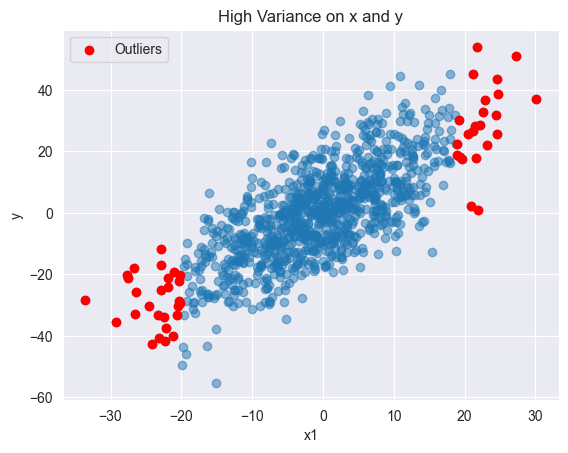

In [8]:
create_linear_data(mean_epsilon=0, std_epsilon=10, mean_x=0, std_x=10, num_samples=1000, title = "High Variance on x and y")

Sum of H diagonals: 2.0
Sum of H diagonals: 2.0
Sum of H diagonals: 1.9999999999999996
Sum of H diagonals: 2.0


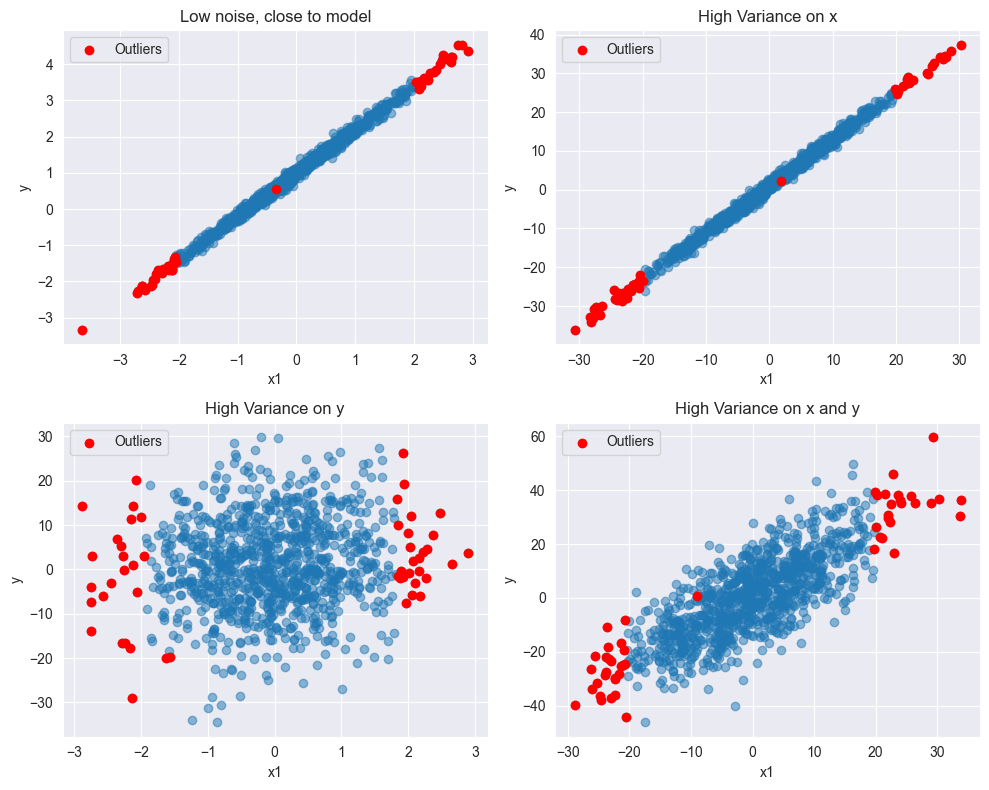

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# Grouped together for subplotting

def create_linear_data(ax, mean_epsilon, std_epsilon, mean_x, std_x, num_samples, title):
    a = 1.2
    b = 1
    x1 = np.random.normal(loc=mean_x, scale=std_x, size=num_samples)
    epsilon = np.random.normal(loc=mean_epsilon, scale=std_epsilon, size=num_samples)
    y = a * x1 + b + epsilon

    data = np.column_stack((x1, [1] * num_samples))
    A = data - np.mean(data, axis=0)
    U, S, VT = np.linalg.svd(A, full_matrices=False)
    H = U @ U.T
    print("Sum of H diagonals:", np.sum(np.diag(H)))  # ar trebui să fie egal cu numărul de variabile (2)
    leverage_scores = np.diag(H)
    threshold = np.quantile(leverage_scores, 0.95)
    outliers = np.where(leverage_scores > threshold)[0]

    # desen pe axa primită ca parametru
    ax.scatter(x1, y, alpha=0.5)
    ax.scatter(x1[outliers], y[outliers], color='red', label='Outliers')
    ax.set_xlabel('x1')
    ax.set_ylabel('y')
    ax.set_title(title)
    ax.legend()


fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()  # le transformăm într-un array 1D pentru acces mai ușor

create_linear_data(axes[0], mean_epsilon=0, std_epsilon=0.1, mean_x=0, std_x=1, num_samples=1000,
                   title="Low noise, close to model")
create_linear_data(axes[1], mean_epsilon=0, std_epsilon=1, mean_x=0, std_x=10, num_samples=1000,
                   title="High Variance on x")
create_linear_data(axes[2], mean_epsilon=0, std_epsilon=10, mean_x=0, std_x=1, num_samples=1000,
                   title="High Variance on y")
create_linear_data(axes[3], mean_epsilon=0, std_epsilon=10, mean_x=0, std_x=10, num_samples=1000,
                   title="High Variance on x and y")

plt.tight_layout()
plt.show()


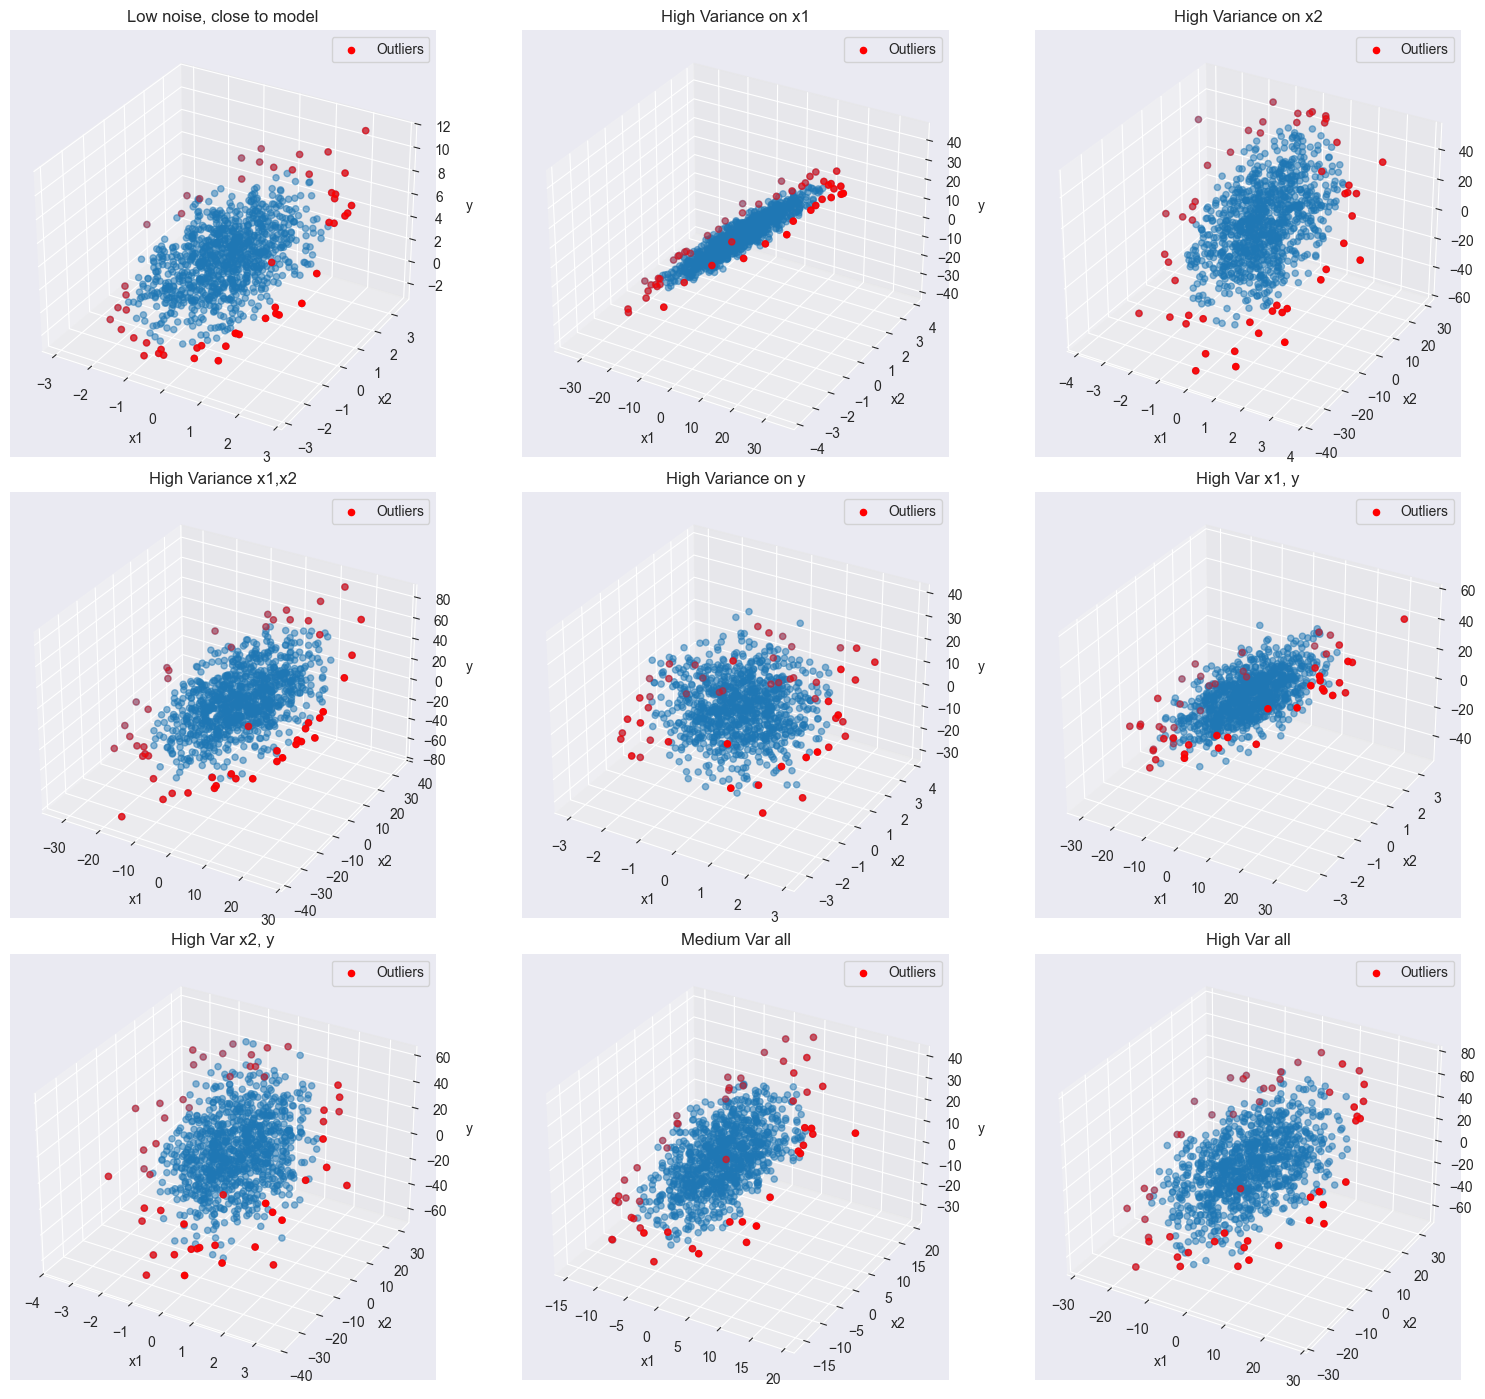

In [11]:
# 3D case - 9 subplots (3x3)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesar pentru proiecții 3D

def create_linear_data(ax, epsilon_params, x1_params, x2_params, num_samples, title):
    mean_epsilon, std_epsilon = epsilon_params
    mean_x1, std_x1 = x1_params
    mean_x2, std_x2 = x2_params

    a = 1.2
    b = 1.6
    c = 3

    # generăm datele
    x1 = np.random.normal(loc=mean_x1, scale=std_x1, size=num_samples)
    x2 = np.random.normal(loc=mean_x2, scale=std_x2, size=num_samples)
    epsilon = np.random.normal(loc=mean_epsilon, scale=std_epsilon, size=num_samples)
    y = a * x1 + b * x2 + c + epsilon

    # calculăm leverage scores
    data = np.column_stack((x1, x2, [1]*num_samples))
    A = data - np.mean(data, axis=0)
    U, S, VT = np.linalg.svd(A, full_matrices=False)
    H = U @ U.T
    leverage_scores = np.diag(H)
    threshold = np.quantile(leverage_scores, 0.95)
    outliers = np.where(leverage_scores > threshold)[0]

    # plot 3D
    ax.scatter(x1, x2, y, alpha=0.5)
    ax.scatter(x1[outliers], x2[outliers], y[outliers], color='red', label='Outliers')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.set_title(title)
    ax.legend()


# Creăm figura 3x3 cu axe 3D
fig, axes = plt.subplots(3, 3, figsize=(16, 14), subplot_kw={"projection": "3d"})
axes = axes.flatten()

# Apeluri pentru 9 scenarii diferite
create_linear_data(axes[0], (0, 0.1), (0, 1), (0, 1), 1000, "Low noise, close to model")
create_linear_data(axes[1], (0, 1), (0, 10), (0, 1), 1000, "High Variance on x1")
create_linear_data(axes[2], (0, 1), (0, 1), (0, 10), 1000, "High Variance on x2")
create_linear_data(axes[3], (0, 5), (0, 10), (0, 10), 1000, "High Variance x1,x2")
create_linear_data(axes[4], (0, 10), (0, 1), (0, 1), 1000, "High Variance on y")
create_linear_data(axes[5], (0, 10), (0, 10), (0, 1), 1000, "High Var x1, y")
create_linear_data(axes[6], (0, 10), (0, 1), (0, 10), 1000, "High Var x2, y")
create_linear_data(axes[7], (0, 5), (0, 5), (0, 5), 1000, "Medium Var all")
create_linear_data(axes[8], (0, 10), (0, 10), (0, 10), 1000, "High Var all")

plt.tight_layout()
plt.show()


# Exercise 2:

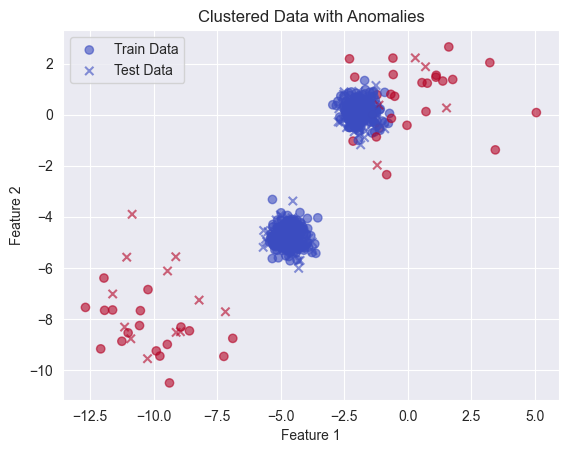

In [63]:
data_cluster = pyod.utils.data.generate_data_clusters(n_train=400, n_test=200, contamination=0.1, n_features=2, n_clusters=2)
# plotam datele, cu indicator de anomaliilor, train + test
X_train, X_test, y_train, y_test = data_cluster
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Train Data', alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Test Data', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustered Data with Anomalies')
plt.legend()
plt.show()

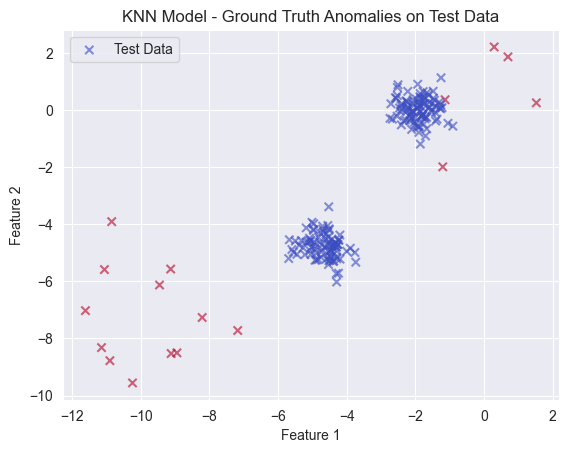

In [75]:
# train KNN model
from pyod.models.knn import KNN
knn_model = KNN(contamination=0.1, n_neighbors=5)
knn_model.fit(X_train)
# predict on test set
y_test_scores = knn_model.decision_function(X_test)
# plot groud truth labels for training set,
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap
='coolwarm', marker='x', label='Test Data', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Model - Ground Truth Anomalies on Test Data')
plt.legend()
plt.show()

In [76]:
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

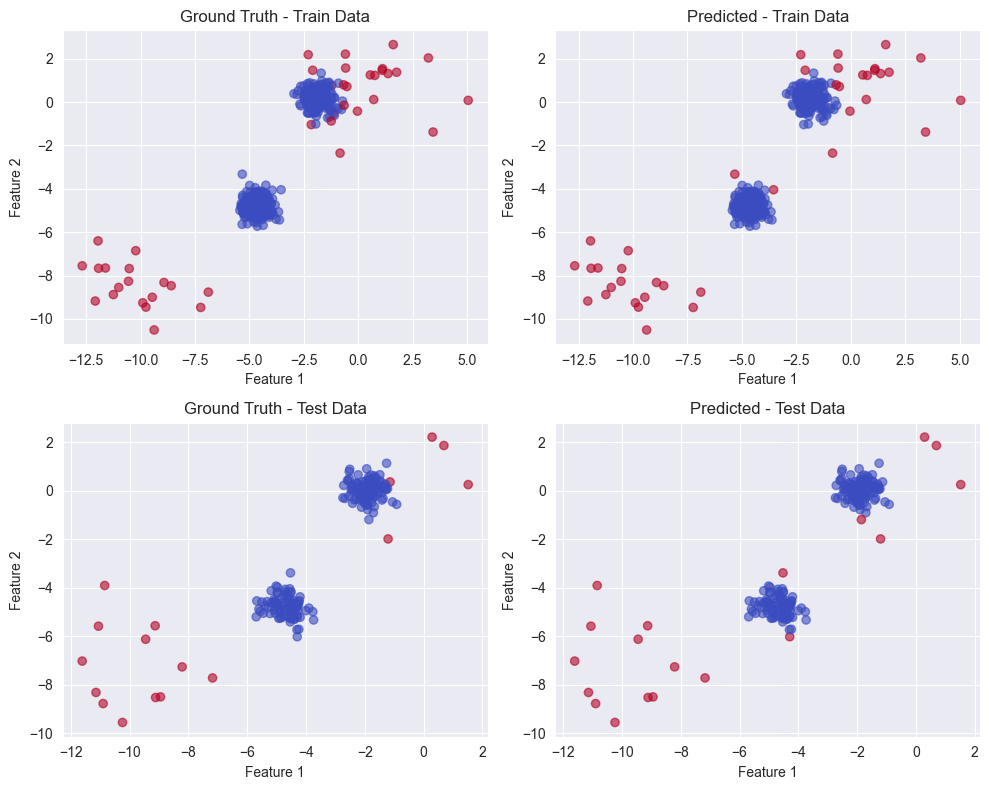

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

# Ground truth - training data
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.6)
axes[0].set_title("Ground Truth - Train Data")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# Predicted - training data
axes[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, cmap='coolwarm', alpha=0.6)
axes[1].set_title("Predicted - Train Data")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

# Ground truth - test data
axes[2].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', alpha=0.6)
axes[2].set_title("Ground Truth - Test Data")
axes[2].set_xlabel("Feature 1")
axes[2].set_ylabel("Feature 2")

# Predicted - test data
axes[3].scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm', alpha=0.6)
axes[3].set_title("Predicted - Test Data")
axes[3].set_xlabel("Feature 1")
axes[3].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

In [83]:
# function
def knn_eval(k):
    knn_model = KNN(contamination=0.1, n_neighbors=k)
    knn_model.fit(X_train)
    # predict on test set
    y_train_pred = knn_model.predict(X_train)
    y_test_pred = knn_model.predict(X_test)

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()

    # Ground truth - training data
    axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.6)
    axes[0].set_title("Ground Truth - Train Data")
    axes[0].set_xlabel("Feature 1")
    axes[0].set_ylabel("Feature 2")

    # Predicted - training data
    axes[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, cmap='coolwarm', alpha=0.6)
    axes[1].set_title("Predicted - Train Data")
    axes[1].set_xlabel("Feature 1")
    axes[1].set_ylabel("Feature 2")

    # Ground truth - test data
    axes[2].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', alpha=0.6)
    axes[2].set_title("Ground Truth - Test Data")
    axes[2].set_xlabel("Feature 1")
    axes[2].set_ylabel("Feature 2")

    # Predicted - test data
    axes[3].scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm', alpha=0.6)
    axes[3].set_title("Predicted - Test Data")
    axes[3].set_xlabel("Feature 1")
    axes[3].set_ylabel("Feature 2")

    plt.tight_layout()
    plt.show()

    # compute Balanced Accuracy
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_test_pred)
    TP = cm[0, 0]
    TN = cm[1, 1]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    BA = (TPR + TNR) / 2
    print(f"Balanced Accuracy (BA) with k={k}: {BA:.2f}")


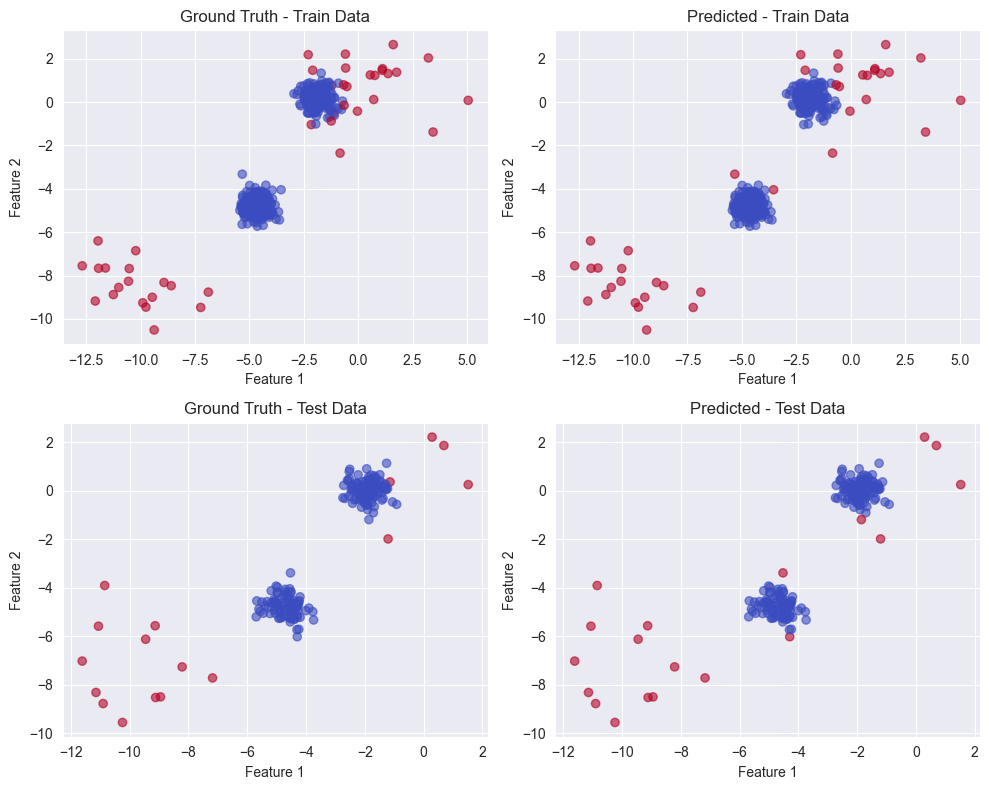

Balanced Accuracy (BA) with k=5: 0.92


In [84]:
knn_eval(5)

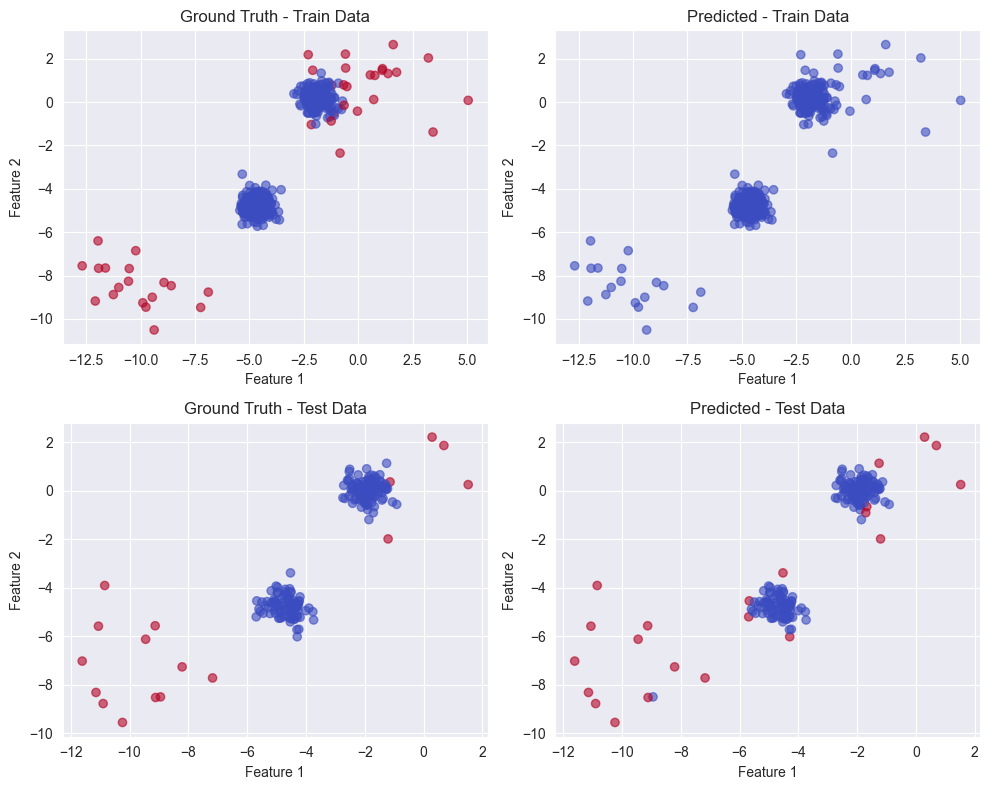

Balanced Accuracy (BA) with k=1: 0.84


In [85]:
knn_eval(1)

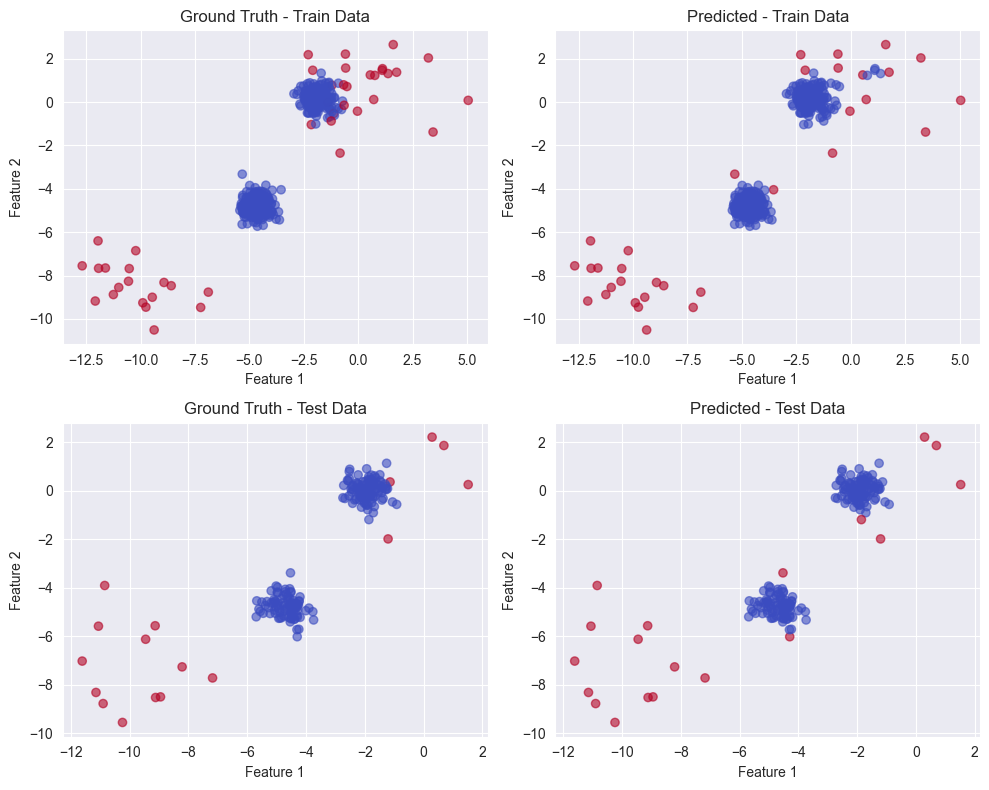

Balanced Accuracy (BA) with k=3: 0.92


In [88]:
knn_eval(3)

# Exercise 3:

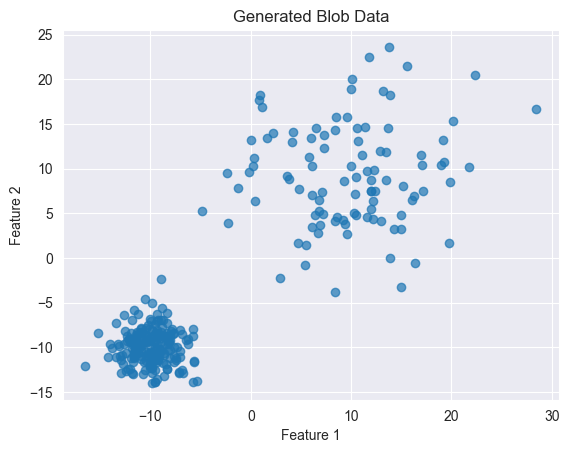

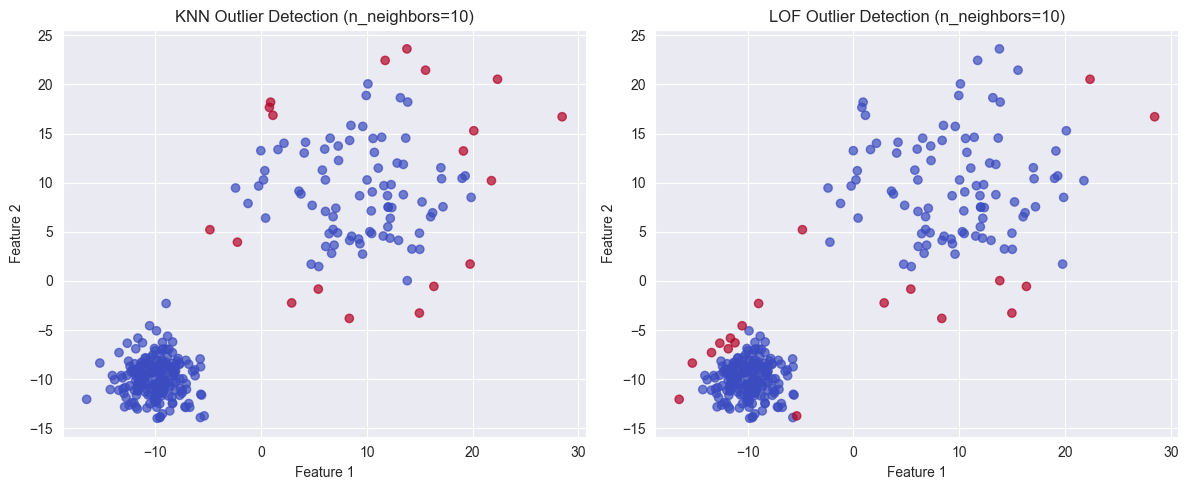

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from pyod.models.knn import KNN
from pyod.models.lof import LOF

X, y = make_blobs(
    n_samples=[200, 100],
    n_features=2,
    centers=[(-10, -10), (10, 10)],
    cluster_std=[2, 6],
    random_state=42
)

# plotam datele generate
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Generated Blob Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


contamination = 0.07  # 7% outlieri

knn = KNN(contamination=contamination, n_neighbors=10)
knn.fit(X)
y_pred_knn = knn.predict(X)

lof = LOF(contamination=contamination, n_neighbors=10)
lof.fit(X)
y_pred_lof = lof.predict(X)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- KNN ---
axes[0].scatter(X[:, 0], X[:, 1], c=y_pred_knn, cmap='coolwarm', alpha=0.7)
axes[0].set_title("KNN Outlier Detection (n_neighbors=10)")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# --- LOF ---
axes[1].scatter(X[:, 0], X[:, 1], c=y_pred_lof, cmap='coolwarm', alpha=0.7)
axes[1].set_title("LOF Outlier Detection (n_neighbors=10)")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


# Exercise 4

In [ ]:
def calculate_BA(cm):
    TP = cm[0, 0]
    TN = cm[1, 1]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    BA = (TPR + TNR) / 2
    return BA

In [3]:
import scipy
data = scipy.io.loadmat("cardio.mat")
X = data["X"]
y = data["y"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.utils.utility import standardizer
from pyod.models.combination import average, maximization

scaler = StandardScaler().fit(X_train)
X_train_n = scaler.transform(X_train)
X_test_n  = scaler.transform(X_test)

contamination = y.mean()  # ex: 0.0961
ks = np.linspace(30, 120, 10, dtype=int)
train_scores_knn, test_scores_knn = [], []
train_scores_lof, test_scores_lof = [], []

print("Per-model Balanced Accuracy (BA):")
for k in ks:
    # ---- KNN ----
    knn_model = KNN(n_neighbors=k, contamination=contamination, method="largest")
    knn_model.fit(X_train_n)
    s_tr_knn = knn_model.decision_scores_
    s_te_knn = knn_model.decision_function(X_test_n)
    thr_knn = np.quantile(s_tr_knn, 1 - contamination)
    yhat_tr_knn = (s_tr_knn >= thr_knn).astype(int)
    yhat_te_knn = (s_te_knn >= thr_knn).astype(int)
    ba_tr_knn = balanced_accuracy_score(y_train, yhat_tr_knn)
    ba_te_knn = balanced_accuracy_score(y_test,  yhat_te_knn)

    # ---- LOF ----
    lof_model = LOF(n_neighbors=k, contamination=contamination)
    lof_model.fit(X_train_n)
    s_tr_lof = lof_model.decision_scores_
    s_te_lof = lof_model.decision_function(X_test_n)
    thr_lof = np.quantile(s_tr_lof, 1 - contamination)
    yhat_tr_lof = (s_tr_lof >= thr_lof).astype(int)
    yhat_te_lof = (s_te_lof >= thr_lof).astype(int)
    ba_tr_lof = balanced_accuracy_score(y_train, yhat_tr_lof)
    ba_te_lof = balanced_accuracy_score(y_test,  yhat_te_lof)

    print(f"k={k:3d} | KNN  BA tr={ba_tr_knn:.3f}  te={ba_te_knn:.3f}   "
          f"| LOF  BA tr={ba_tr_lof:.3f}  te={ba_te_lof:.3f}")

    train_scores_knn.append(s_tr_knn); test_scores_knn.append(s_te_knn)
    train_scores_lof.append(s_tr_lof); test_scores_lof.append(s_te_lof)

train_scores_knn = np.vstack(train_scores_knn)
test_scores_knn  = np.vstack(test_scores_knn)
train_scores_lof = np.vstack(train_scores_lof)
test_scores_lof  = np.vstack(test_scores_lof)

def evaluate_ensemble(name, tr_scores, te_scores):
    tr_std, te_std = standardizer(tr_scores.T, te_scores.T)

    from pyod.models.combination import average, maximization

    for strat_name, combiner in [("Average", average), ("Maximization", maximization)]:
        comb_tr = combiner(tr_std)
        comb_te = combiner(te_std)

        thr = np.quantile(comb_tr, 1 - contamination)
        yhat_tr = (comb_tr >= thr).astype(int)
        yhat_te = (comb_te >= thr).astype(int)

        ba_tr = balanced_accuracy_score(y_train, yhat_tr)
        ba_te = balanced_accuracy_score(y_test,  yhat_te)
        cm = confusion_matrix(y_test, yhat_te)

        print(f"[{name} | {strat_name}] BA tr={ba_tr:.3f} | BA te={ba_te:.3f}")
        print(f"[{name} | {strat_name}] Confusion matrix (test):\n{cm}\n")

evaluate_ensemble("KNN", train_scores_knn, test_scores_knn)


Per-model Balanced Accuracy (BA):
k= 30 | KNN  BA tr=0.707  te=0.674   | LOF  BA tr=0.545  te=0.549
k= 40 | KNN  BA tr=0.716  te=0.686   | LOF  BA tr=0.541  te=0.553
k= 50 | KNN  BA tr=0.725  te=0.715   | LOF  BA tr=0.550  te=0.561
k= 60 | KNN  BA tr=0.725  te=0.724   | LOF  BA tr=0.563  te=0.579
k= 70 | KNN  BA tr=0.734  te=0.743   | LOF  BA tr=0.581  te=0.591
k= 80 | KNN  BA tr=0.748  te=0.752   | LOF  BA tr=0.613  te=0.596
k= 90 | KNN  BA tr=0.752  te=0.752   | LOF  BA tr=0.635  te=0.624
k=100 | KNN  BA tr=0.752  te=0.752   | LOF  BA tr=0.653  te=0.628
k=110 | KNN  BA tr=0.748  te=0.753   | LOF  BA tr=0.667  te=0.640
k=120 | KNN  BA tr=0.752  te=0.764   | LOF  BA tr=0.689  te=0.651
[KNN | Average] BA tr=0.730 | BA te=0.743
[KNN | Average] Confusion matrix (test):
[[476  21]
 [ 25  28]]

[KNN | Maximization] BA tr=0.752 | BA te=0.752
[KNN | Maximization] Confusion matrix (test):
[[476  21]
 [ 24  29]]

[LOF | Average] BA tr=0.595 | BA te=0.590
[LOF | Average] Confusion matrix (test):

In [9]:
evaluate_ensemble("LOF", train_scores_lof, test_scores_lof)

[LOF | Average] BA tr=0.595 | BA te=0.590
[LOF | Average] Confusion matrix (test):
[[455  42]
 [ 39  14]]

[LOF | Maximization] BA tr=0.635 | BA te=0.635
[LOF | Maximization] Confusion matrix (test):
[[462  35]
 [ 35  18]]

